In [1]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

## Data Handling in PyG

### Data

Let's create a dummy graph

In [2]:
embeddings = torch.rand((100, 16), dtype=torch.float)

In [3]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

In [4]:
edges_attr = np.random.choice(3,500)

In [5]:
ys = torch.rand((100)).round().long()

Convert the graph information into a PyG Data object

In [6]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

In [7]:
graph

Data(edge_attr=[1 0 1 1 1 1 2 2 1 0 2 0 0 2 1 2 0 0 2 2 1 0 2 0 2 2 2 2 1 0 0 1 2 1 0 1 1
 1 2 2 0 1 2 0 1 0 0 1 0 1 2 0 2 0 1 0 2 1 2 2 2 0 2 1 0 2 2 1 0 0 2 2 1 1
 0 2 2 2 0 2 1 0 1 0 1 2 0 1 1 1 0 0 2 0 0 1 1 0 0 0 0 2 1 2 0 1 1 2 1 0 0
 1 2 0 0 2 0 0 1 0 1 2 1 0 2 2 2 1 1 0 2 2 1 2 0 1 1 2 0 0 2 2 1 0 1 1 1 1
 2 0 0 2 0 0 0 0 2 2 1 0 0 1 0 2 0 0 0 2 2 0 2 2 1 0 2 1 2 0 0 0 0 2 0 2 2
 0 2 2 2 0 2 1 1 0 0 1 1 2 0 0 1 2 1 2 1 0 0 1 2 2 1 1 2 0 2 1 0 2 0 0 1 0
 0 2 1 1 0 0 2 2 2 1 2 1 1 2 2 2 2 1 2 2 1 2 2 1 0 2 1 2 0 2 2 2 0 1 0 0 2
 0 0 1 1 0 1 2 0 2 0 1 1 0 0 1 1 1 1 0 0 0 2 2 1 1 2 0 1 1 1 2 1 1 1 0 0 2
 2 0 2 2 2 1 0 2 2 2 2 1 1 2 0 0 2 0 1 0 0 1 2 2 1 0 1 2 0 1 2 2 0 1 1 2 2
 2 2 0 0 0 0 2 2 0 0 0 0 0 1 2 2 2 1 2 1 0 0 2 0 2 0 1 2 1 2 2 1 0 1 2 2 0
 0 1 2 0 0 2 1 0 2 1 1 2 2 1 0 2 1 0 2 0 0 0 1 0 1 1 0 2 1 1 2 1 0 2 1 1 2
 1 2 0 0 2 2 1 1 0 0 1 2 1 0 1 0 2 1 0 2 1 2 1 0 1 2 0 0 1 1 0 2 1 0 0 1 1
 1 1 1 1 0 0 2 0 0 0 1 0 1 2 2 2 1 1 0 0 0 0 1 1 1 2 1 0 1 2 2 1 0 2 1 2 2
 1 0 0 1 1

Let's visualize the information contained in the data object

In [8]:
for prop in graph:
    print(prop)

('edge_attr', array([1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0,
       2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1,
       1, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0,
       0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2,
       1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2,
       0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0,
       1, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 

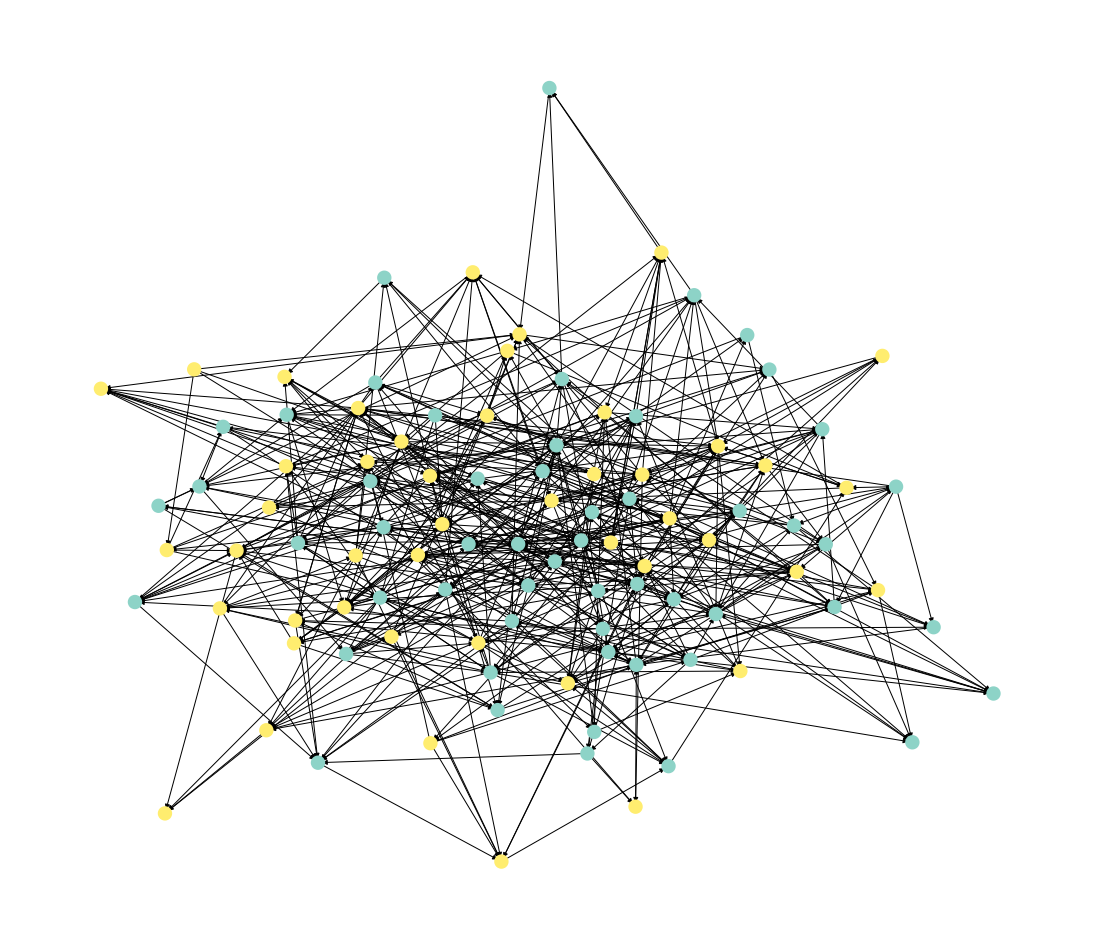

In [9]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
plt.show()

### Batch

With the Batch object we can represent multiple graphs as a single disconnected graph

In [10]:
graph2 = graph

In [11]:
batch = data.Batch().from_data_list([graph, graph2])

In [12]:
print("Number of graphs:",batch.num_graphs)
print("Graph at index 1:",batch[1])
print("Retrieve the list of graphs:\n",len(batch.to_data_list()))

Number of graphs: 2
Graph at index 1: Data(edge_attr=[1 0 1 1 1 1 2 2 1 0 2 0 0 2 1 2 0 0 2 2 1 0 2 0 2 2 2 2 1 0 0 1 2 1 0 1 1
 1 2 2 0 1 2 0 1 0 0 1 0 1 2 0 2 0 1 0 2 1 2 2 2 0 2 1 0 2 2 1 0 0 2 2 1 1
 0 2 2 2 0 2 1 0 1 0 1 2 0 1 1 1 0 0 2 0 0 1 1 0 0 0 0 2 1 2 0 1 1 2 1 0 0
 1 2 0 0 2 0 0 1 0 1 2 1 0 2 2 2 1 1 0 2 2 1 2 0 1 1 2 0 0 2 2 1 0 1 1 1 1
 2 0 0 2 0 0 0 0 2 2 1 0 0 1 0 2 0 0 0 2 2 0 2 2 1 0 2 1 2 0 0 0 0 2 0 2 2
 0 2 2 2 0 2 1 1 0 0 1 1 2 0 0 1 2 1 2 1 0 0 1 2 2 1 1 2 0 2 1 0 2 0 0 1 0
 0 2 1 1 0 0 2 2 2 1 2 1 1 2 2 2 2 1 2 2 1 2 2 1 0 2 1 2 0 2 2 2 0 1 0 0 2
 0 0 1 1 0 1 2 0 2 0 1 1 0 0 1 1 1 1 0 0 0 2 2 1 1 2 0 1 1 1 2 1 1 1 0 0 2
 2 0 2 2 2 1 0 2 2 2 2 1 1 2 0 0 2 0 1 0 0 1 2 2 1 0 1 2 0 1 2 2 0 1 1 2 2
 2 2 0 0 0 0 2 2 0 0 0 0 0 1 2 2 2 1 2 1 0 0 2 0 2 0 1 2 1 2 2 1 0 1 2 2 0
 0 1 2 0 0 2 1 0 2 1 1 2 2 1 0 2 1 0 2 0 0 0 1 0 1 1 0 2 1 1 2 1 0 2 1 1 2
 1 2 0 0 2 2 1 1 0 0 1 2 1 0 1 0 2 1 0 2 1 2 1 0 1 2 0 0 1 1 0 2 1 0 0 1 1
 1 1 1 1 0 0 2 0 0 0 1 0 1 2 2 2 1 1 0 0 0 0 1 

### Cluster

ClusterData groups the nodes of a graph into a specific number of cluster for faster computation in large graphs, then use ClusterLoader to load batches of clusters

In [13]:
#cluster = data.ClusterData(graph, 5)

In [14]:
#clusterloader = data.ClusterLoader(cluster)

### Sampler

For each convolutional layer, sample a maximum of nodes from each neighborhood (as in GraphSAGE)

In [15]:
sampler = data.NeighborSampler(graph.edge_index, sizes=[3,10], batch_size=4,
                                  shuffle=False)

In [16]:
for s in sampler:
    print(s)
    break

(4, tensor([ 0,  1,  2,  3, 58, 26, 88, 34, 19, 56, 89, 31, 15, 57, 44, 94, 24, 61,
        66, 73, 71, 49, 63, 92, 86,  5, 40, 97, 93, 18, 70, 72, 82, 78, 75, 53,
        13, 33, 50, 96, 90, 81, 68, 47, 12, 36, 38, 37, 39, 80, 69, 29,  9, 10,
        32, 79, 25,  8]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6, 15, 16, 17, 18,  7,  8,  9, 13,  1, 10, 11, 12, 13, 14, 19,
         20, 21, 22, 23, 24, 25, 26,  8, 27, 28, 29, 30, 31, 32, 11, 11, 15, 22,
         33, 34, 35, 36, 37, 38, 39, 39, 40, 41, 41, 42, 43, 44, 45, 25, 46, 46,
          6, 21, 42, 47, 48,  8, 24, 49, 50, 51,  6, 14, 22, 52, 53, 12, 16, 41,
         53, 54, 25, 55, 56, 57],
        [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,
          3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,  9,
         10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 1

In [17]:
print("Batch size:", s[0])
print("Number of unique nodes involved in the sampling:",len(s[1]))
print("Number of neighbors sampled:", len(s[2][0].edge_index[0]), len(s[2][1].edge_index[0]))

Batch size: 4
Number of unique nodes involved in the sampling: 58
Number of neighbors sampled: 78 12


### Datasets

List all the available datasets

In [18]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'QM7b',
 'QM9',
 'ZINC',
 'MoleculeNet',
 'Entities',
 'GEDDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'ICEWS18',
 'GDELT',
 'DBP15K',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'TrackMLParticleTrackingDataset',
 'AMiner',
 'WordNet18',
 'WordNet18RR',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'Actor',
 'JODIEDataset',
 'MixHopSyntheticDataset']

In [19]:
name = 'Cora'
transform = transforms.Compose([
    transforms.AddTrainValTestMask('train_rest', num_val=500, num_test=500),
    transforms.TargetIndegree(),
])
cora = datasets.Planetoid('./data', name, pre_transform=transforms.NormalizeFeatures(), transform=transform)

In [20]:
aids = datasets.TUDataset(root="./data", name="AIDS")

In [21]:
print("AIDS info:")
print('# of graphs:', len(aids))
print('# Classes (graphs)', aids.num_classes)
print('# Edge features', aids.num_edge_features)
print('# Edge labels', aids.num_edge_labels)
print('# Node features', aids.num_node_features)

AIDS info:
# of graphs: 2000
# Classes (graphs) 2
# Edge features 3
# Edge labels 3
# Node features 38


In [22]:
print("Cora info:")
print('# of graphs:', len(cora))
print('# Classes (nodes)', cora.num_classes)
print('# Edge features', cora.num_edge_features)
print('# Node features', cora.num_node_features)

Cora info:
# of graphs: 1
# Classes (nodes) 7
# Edge features 1
# Node features 1433


In [23]:
aids.data

Data(edge_attr=[64780, 3], edge_index=[2, 64780], x=[31385, 38], y=[2000])

In [24]:
aids[0]

Data(edge_attr=[106, 3], edge_index=[2, 106], x=[47, 38], y=[1])

In [25]:
cora.data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [26]:
cora[0]

Data(edge_attr=[10556, 1], edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [28]:
cora_loader = data.DataLoader(cora)

In [29]:
for l in cora_loader:
    print(l)
    break

Batch(batch=[2708], edge_attr=[10556, 1], edge_index=[2, 10556], ptr=[2], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
